# Изучение формата полученных MIDI файлов

In [12]:
import glob
import os
import sys
import random
import joblib
from tqdm import tqdm
import pretty_midi

In [2]:
midi_folder = '/home/storage/3020/db/K_cluster2_backup/TD/data'
midi_list = glob.glob(midi_folder + '/*')
print(f'Number of MIDI files: {len(midi_list)}')
print('File example:')
print(random.sample(midi_list, 1)[0].split('/')[-1])

Number of MIDI files: 1276
File example:
MIDI-Unprocessed_070_PIANO070_MID--AUDIO-split_07-08-17_Piano-e_1-02_wav--2


In [3]:
data = []
for file in tqdm(midi_list):
    seqs = joblib.load(file)
    for seq in seqs:
        data.append(seq)

100%|██████████| 1276/1276 [16:24<00:00,  1.30it/s]


In [15]:
print(type(data[0]))
print(len(data[0]), len(data[1]), len(data[2]), len(data[3]))
print(max(data[0]), min(data[0]))

<class 'list'>
1191 1191 1191 1191
379 43


Исследуем предоставленный датасет на совпадение в плане данных с [репозиторием](https://github.com/gwinndr/MusicTransformer-Pytorch)  
Посмотрим для простоты минимум и максимум по всей выборке и сравним с одной из записей из датасета MAESTRO

In [17]:
global_min = 1000
global_max = 0

for sample in tqdm(data):
    if len(sample) > 0:
        if max(sample) > global_max:
            global_max = max(sample)
        if min(sample) < global_min:
            global_min = min(sample)
            
print(f'Values in MIDI files range from {global_min} to {global_max}')

100%|██████████| 367320/367320 [00:29<00:00, 12370.16it/s]

Values in MIDI files range from 19 to 387


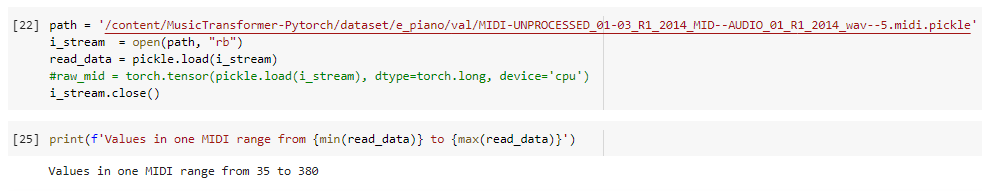

Похоже, что мы используем одинаковые форматы. В таком случае воспользуемся кодом репозитория и попробуем обучить модель на наших данных.  
P.S: после более аккуратного вглядывания в название файла обнаружил, что переданный датасет как раз и является датасетом MAESTRO, что вселяет уверенность, т.к. демонстрационный ноутбук из репозитория запустился и позволил обучить модель